# Problem 1: From 2D Gaussian to Elliptical Confidence Contours (6 points)

Consider a 2D Gaussian (normal) distribution with mean $\mu \in \mathbb{R}^2$ and covariance matrix $\Sigma \in \mathbb{R}^{2\times 2}$ (symmetric, positive definite). Its density is

$$p(x) = \frac{1}{2\pi|\Sigma|^{1/2}} \exp\left(-\frac{1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu)\right)$$

In EM-based Gaussian Mixture Models (GMMs), we often visualize each component by drawing an ellipse corresponding to a chosen confidence level (e.g., $\approx 95\%$). This problem derives that ellipse **from first principles**.

---


**(a)** Show that the **equal-density contours** of $p(x)$ are the level sets of the quadratic form

$$(x-\mu)^T \Sigma^{-1} (x-\mu) = c$$

for some constant $c > 0$. (Hint: take $\log p(x)$ and isolate the quadratic form.)

**(b)** Explain why these level sets are **ellipses** when $\Sigma$ is symmetric positive definite.


Let the eigendecomposition be $\Sigma = V \Lambda V^T$, where

$$\Lambda = \text{diag}(\lambda_1, \lambda_2), \quad \lambda_1 \ge \lambda_2 > 0, \quad V = [v_1 \; v_2], \; V^T V = I$$

Show that under the change of variables $y = V^T (x-\mu)$, the quadratic form becomes

$$(x-\mu)^T \Sigma^{-1} (x-\mu) = \frac{y_1^2}{\lambda_1} + \frac{y_2^2}{\lambda_2}$$

**(c)** Hence, prove that the level set $(x-\mu)^T \Sigma^{-1} (x-\mu) = c$ is an ellipse centered at $\mu$ with **principal axes directions** given by $v_1, v_2$ and **semi-axis lengths**

$$a_1 = \sqrt{c\,\lambda_1}, \qquad a_2 = \sqrt{c\,\lambda_2}$$

State clearly how the **rotation angle** of the ellipse relates to the eigenvectors.

**(d)** Let $X \sim N(\mu, \Sigma)$. Define the **Mahalanobis distance squared**

$$D^2(X) = (X-\mu)^T \Sigma^{-1} (X-\mu)$$

Show that $D^2(X) \sim \chi^2_2$ (chi-square distribution with 2 degrees of freedom).

**(e)** Let $c_\alpha$ be the $\alpha$-quantile of $\chi^2_2$, i.e.,

$$\mathbb{P}\left(D^2(X) \le c_\alpha\right) = \alpha$$

Explain why the ellipse

$$(x-\mu)^T \Sigma^{-1} (x-\mu) = c_\alpha$$

captures a proportion $\alpha$ of the probability mass (e.g., $\alpha = 0.95$ for a $95\%$ ellipse).



**(f)** Briefly compare how **K-Means** partitions space versus how **GMM/EM** assigns points (highest posterior under Gaussian components), and why ellipses arise naturally for GMMs but not for K-Means.

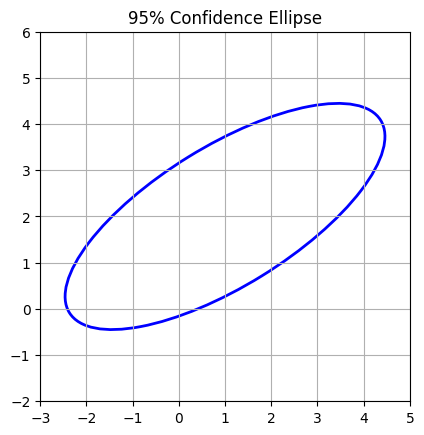

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy import stats

def plot_confidence_ellipse(mean, cov, ax, confidence=0.95, **kwargs):
    """
    Plot confidence ellipse for 2D Gaussian distribution.

    Parameters:
    - mean: 2D mean vector
    - cov: 2x2 covariance matrix
    - ax: matplotlib axes object
    - confidence: confidence level (default 0.95)
    """
    # Eigendecomposition
    eigenvals, eigenvecs = np.linalg.eigh(cov)

    # Sort by eigenvalue (descending)
    idx = np.argsort(eigenvals)[::-1]
    eigenvals = eigenvals[idx]
    eigenvecs = eigenvecs[:, idx]

    # Chi-square quantile
    chi2_val = stats.chi2.ppf(confidence, df=2)

    # Semi-axis lengths
    a = np.sqrt(chi2_val * eigenvals[0])  # major semi-axis
    b = np.sqrt(chi2_val * eigenvals[1])  # minor semi-axis

    # Rotation angle (in degrees)
    angle = np.degrees(np.arctan2(eigenvecs[1, 0], eigenvecs[0, 0]))

    # Create ellipse
    ellipse = Ellipse(mean, 2*a, 2*b, angle=angle, **kwargs)
    ax.add_patch(ellipse)

    return ellipse

# Example usage:
mean = np.array([1, 2])
cov = np.array([[2, 1], [1, 1]])
fig, ax = plt.subplots()
plot_confidence_ellipse(mean, cov, ax, fill=False, edgecolor='blue', linewidth=2)
ax.set_aspect('equal')
ax.grid(True)
ax.set_xlim(-3, 5)
ax.set_ylim(-2, 6)
plt.title('95% Confidence Ellipse')
plt.show()
#---

## Optional: Python Implementation: use the following code to numerically experiment with the mathematical concepts above.

# Problem 2 (4 points)

We will compare K-means (Lloyd’s), Meanshift and Spectral Clustering methods on the three data sets shown in the scatterplots below.

Use **Scikit-learn** module in Python to import MeanShift, K-means and Spectral Clustering algorithms.  

Please refer to tutorials on  
`Sklearn.cluster.MeanShift`, `Sklearn.cluster.KMeans`, and `Sklearn.cluster.SpectralClustering`.

```python
from sklearn.cluster import MeanShift, KMeans, SpectralClustering
```

-  Run K-means, MeanShift and Spectral clustering on the 3 datasets. Why does each perform well or worse on some datasets?  

- Set bandwidth h to be the 20% quantile of interpoint distances when using MeanShift.  

- Set $K = 2$ for case-1,2 and $K = 3$ for case-3 when using **K-means** and **Spectral clustering**.  



In [2]:
import sys
!{sys.executable} -m pip install sklearn.cluster
import random
import math
import numpy as np

random.seed(0)

# -------------------
# Data Set 1
# -------------------
X1 = []
for i in range(1000):
    theta = random.uniform(0, 2 * math.pi)
    radius = random.gauss(0, 0.2) + random.choice([1, 3])
    X1.append([radius * math.cos(theta), radius * math.sin(theta)])
X1 = np.array(X1)

# -------------------
# Data Set 2
# -------------------
X2 = []
for i in range(1000):
    theta = random.uniform(0, 2 * math.pi)
    radius = random.gauss(0, 0.1) + 2
    if theta < math.pi:
        X2.append([radius * math.cos(theta) - 1, radius * math.sin(theta)])
    else:
        X2.append([radius * math.cos(theta) + 1, radius * math.sin(theta)])
X2 = np.array(X2)

# -------------------
# Data Set 3
# -------------------
X3 = []
for i in range(1000):
    radius = random.gauss(0, 1)
    theta = random.uniform(0, 2 * math.pi)
    center = random.choice([[0, 1], [3, 3], [1, -3]])
    X3.append([radius * math.cos(theta) + center[0],
               radius * math.sin(theta) + center[1]])
X3 = np.array(X3)


ERROR: Could not find a version that satisfies the requirement sklearn.cluster (from versions: none)
ERROR: No matching distribution found for sklearn.cluster


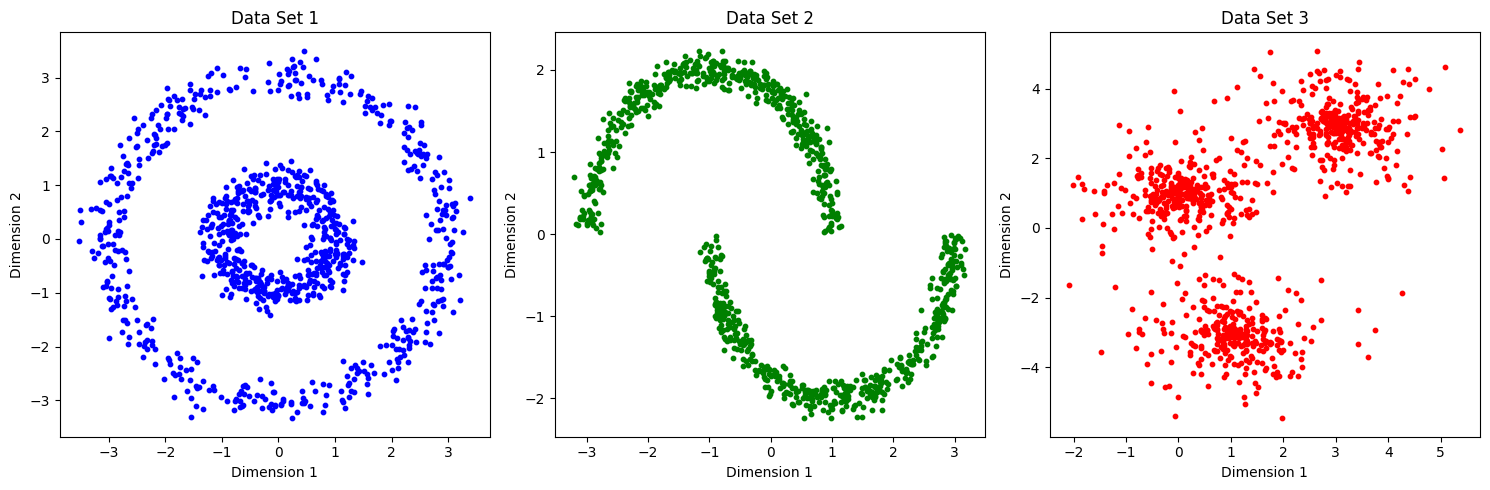

In [3]:
import matplotlib.pyplot as plt

# Plot the three datasets side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(X1[:, 0], X1[:, 1], s=10, c="blue")
axes[0].set_title("Data Set 1")
axes[0].set_xlabel("Dimension 1")
axes[0].set_ylabel("Dimension 2")

axes[1].scatter(X2[:, 0], X2[:, 1], s=10, c="green")
axes[1].set_title("Data Set 2")
axes[1].set_xlabel("Dimension 1")
axes[1].set_ylabel("Dimension 2")

axes[2].scatter(X3[:, 0], X3[:, 1], s=10, c="red")
axes[2].set_title("Data Set 3")
axes[2].set_xlabel("Dimension 1")
axes[2].set_ylabel("Dimension 2")

plt.tight_layout()
plt.show()


In [4]:
## assume 'labels' is a list/array of group labels
## and X is the dataset being clustered
import matplotlib.pyplot as plt
import numpy as np

def plot_clusters(X, labels, title="Clustering Result"):
    """
    X: np.array of shape (n_samples, 2)
    labels: cluster labels (list or np.array)
    """
    unique_labels = np.unique(labels)
    colors = ['r', 'b', 'y', 'g', 'c', 'm', 'k', 'orange']

    for i, label in enumerate(unique_labels):
        points = X[labels == label]
        plt.scatter(points[:, 0], points[:, 1],
                    c=colors[i % len(colors)],
                    label=f"Cluster {label}", s=10)

    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.title(title)
    plt.legend()
    plt.show()


c:\Users\saad_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\saad_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


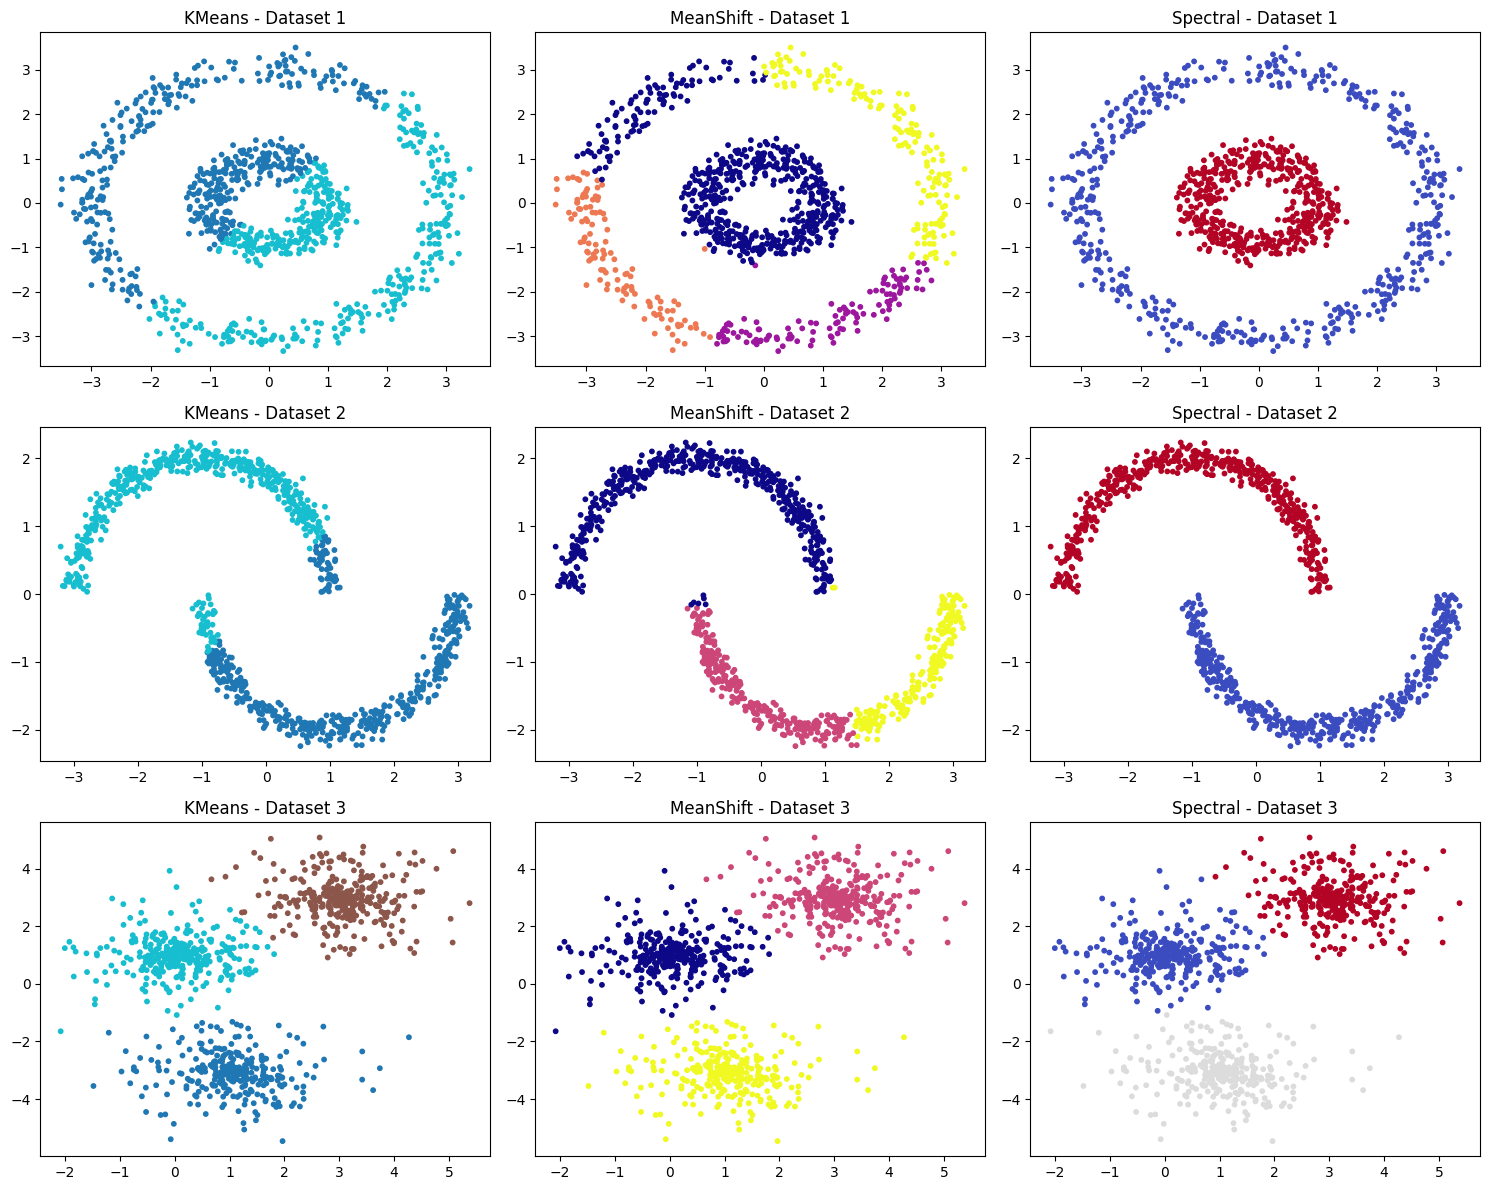

In [5]:
from sklearn.cluster import MeanShift, KMeans, SpectralClustering
from sklearn.metrics import pairwise_distances
import numpy as np
import matplotlib.pyplot as plt

datasets = [(X1, 2), (X2, 2), (X3, 3)]  # (X, K)

# Define colormaps (or explicit colors) for each algorithm
cmaps = {
    "kmeans": "tab10",
    "meanshift": "plasma",
    "spectral": "coolwarm"
}

fig, axes = plt.subplots(len(datasets), 3, figsize=(15, 12))

for row_idx, (X, K) in enumerate(datasets):
    # 1. KMeans
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans_labels = kmeans.fit_predict(X)

    ax = axes[row_idx, 0]
    ax.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap=cmaps["kmeans"], s=10)
    ax.set_title(f"KMeans - Dataset {row_idx+1}")

    # 2. MeanShift: bandwidth = 20% quantile of pairwise distances
    dists = pairwise_distances(X)
    dists = dists[np.triu_indices_from(dists, k=1)]
    bandwidth = np.quantile(dists, 0.2)
    meanshift = MeanShift(bandwidth=bandwidth)
    meanshift_labels = meanshift.fit_predict(X)

    ax = axes[row_idx, 1]
    ax.scatter(X[:, 0], X[:, 1], c=meanshift_labels, cmap=cmaps["meanshift"], s=10)
    ax.set_title(f"MeanShift - Dataset {row_idx+1}")

    # 3. Spectral Clustering
    spectral = SpectralClustering(n_clusters=K, affinity='nearest_neighbors', random_state=0)
    spectral_labels = spectral.fit_predict(X)

    ax = axes[row_idx, 2]
    ax.scatter(X[:, 0], X[:, 1], c=spectral_labels, cmap=cmaps["spectral"], s=10)
    ax.set_title(f"Spectral - Dataset {row_idx+1}")

plt.tight_layout()
plt.show()